In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [50]:
sim_num = 1000
size = 100
prop = np.arange(0,1.1,0.1)
sim_res_dic = {}
te = 10
# assume 1000 in each strata
N = 1000
for j in range(len(prop)):
    temp_res = []
    p = prop[j]
    disprop_size = int(size * p)
    comp_size = size - disprop_size
    for i in range(sim_num):
        #g1 = stats.norm.rvs(size = 100, loc=2, scale = 1)
        #g2 = stats.norm.rvs(size = 100, loc=3, scale = 10)
        g1c = stats.expon.rvs(size=disprop_size,scale=10)
        g2c = stats.expon.rvs(size=comp_size,scale=0.5)
        g1t = stats.expon.rvs(size=comp_size,scale=10)+te
        g2t = stats.expon.rvs(size=disprop_size,scale=0.5)+te 
        '''g1c = stats.norm.rvs(size=disprop_size,loc=2,scale=100)
        g2c = stats.norm.rvs(size=comp_size,loc=3,scale=0.5)
        g1t = stats.norm.rvs(size=comp_size,loc=2,scale=100)+te
        g2t = stats.norm.rvs(size=disprop_size,loc=3,scale=0.5)+te''' 
        g1 = np.append(g1c,g2c) # control group
        g2 = np.append(g1t,g2t) # treatment group
        two_te = np.mean(g2) - np.mean(g1)
        g1_var = np.var(g1,ddof=1)
        g2_var = np.var(g2,ddof=1)
        g1_var2 = np.nan_to_num(np.var(g1c,ddof=1)) * disprop_size / size + np.nan_to_num(np.var(g2c,ddof=1)) * comp_size / size
        g2_var2 = np.nan_to_num(np.var(g1t,ddof=1)) * comp_size / size + np.nan_to_num(np.var(g2t,ddof=1)) * disprop_size / size
        se = (g1_var/size + g2_var/size)**0.5
        se2 = (g1_var2/size + g2_var2/size)**0.5
        #stratified_var
        #control_var = (1/2)**2*(N-disprop_size)/(N)*np.var(g1c,ddof=1)/disprop_size + (1/2)**2*(N-comp_size)/(N)*np.var(g2c,ddof=1)/comp_size
        #treat_var = (1/2)**2*(N-disprop_size)/(N)*np.var(g2t,ddof=1)/disprop_size + (1/2)**2*(N-comp_size)/(N)*np.var(g1t,ddof=1)/comp_size
        #control_var = (1/2)**2*np.var(g1c,ddof=1)/disprop_size + (1/2)**2*np.var(g2c,ddof=1)/comp_size
        #treat_var = (1/2)**2*np.var(g2t,ddof=1)/disprop_size + (1/2)**2*np.var(g1t,ddof=1)/comp_size
        #se2 = (control_var + treat_var)**0.5
        temp_res.append([two_te,se,se2,g1_var,g2_var])
    sim_res_dic[prop[j]] = pd.DataFrame(temp_res, columns = ['two_est','two_se','two_se2','g1_var','g2_var'])


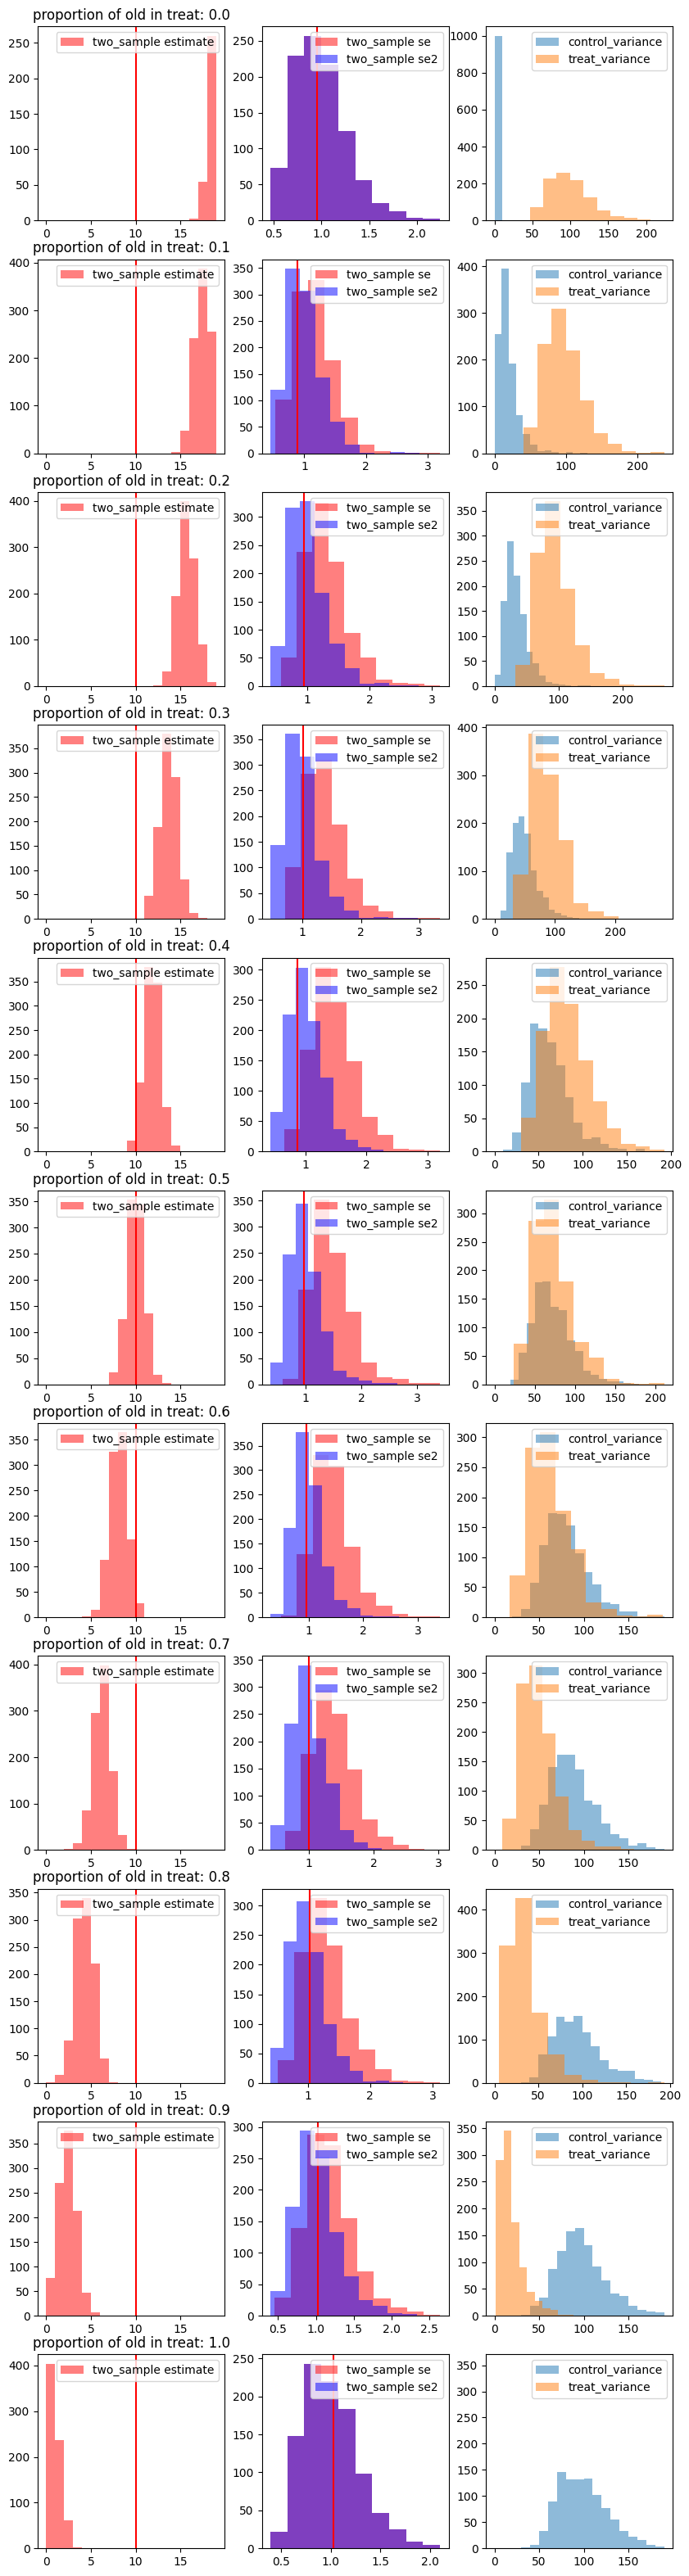

In [51]:
plt.rcParams['figure.figsize'] = [10, 40]
fig, ax = plt.subplots(len(prop), 3)
for j in range(len(prop)):
    sim_res = sim_res_dic[prop[j]]
    ax[j,0].hist(sim_res['two_est'], bins=np.arange(0,20,1),
             alpha=0.5,  
             label='two_sample estimate', 
             color='red') # customized color parameter 
    ax[j,0].legend(loc='upper right') 
    ax[j,0].axvline(te,color='red')

    ax[j,1].hist(np.power(sim_res['two_se'],2), 
             alpha=0.5,  
             label='two_sample se', 
             color='red') # customized color parameter 
    ax[j,1].hist(np.power(sim_res['two_se2'],2),   #bins=range(5,50,1), 
             alpha=0.5,  
             label='two_sample se2', 
             color='blue') # customized color parameter 
    ax[j,1].legend(loc='upper right') 
    ax[j,1].axvline(np.var(sim_res['two_est'],ddof=1), color='red')
    ax[j,0].set_title("proportion of old in treat: " + str(round(prop[j],1)))
    ax[j,2].hist(sim_res['g1_var'], bins=np.arange(0,200,10),
                alpha=0.5,
                label='control_variance')
    ax[j,2].hist(sim_res['g2_var'],
                alpha=0.5,
                label='treat_variance')
    ax[j,2].legend()
plt.show() 

looks like NORMALITY is what we need to keep the two sample se still. maybe transform the outcome to better fit normal?

In [48]:
sim_res_dic[prop[0]]['two_se2'],sim_res_dic[prop[0]]['two_se']

(0       8.541613
 1      10.970339
 2       9.752087
 3       8.845511
 4      11.487062
          ...    
 995    12.854802
 996    11.058995
 997    11.665227
 998    10.603563
 999    10.241065
 Name: two_se2, Length: 1000, dtype: float64,
 0      0.854161
 1      1.097034
 2      0.975209
 3      0.884551
 4      1.148706
          ...   
 995    1.285480
 996    1.105899
 997    1.166523
 998    1.060356
 999    1.024106
 Name: two_se, Length: 1000, dtype: float64)

maybe contorl var needs to be weighted by the proportion of g1 and g2 obs in the group, and similarly treat var needs to be weighted by the proportion of g1 and g2 obs in the group